In [1]:
import pandas as pd
from metrics import get_results
from graphics import get_heatmap, get_pairs_heatmap, get_mean_sd_heatmap, get_mean_sd_diff_heatmap

In [2]:
import warnings

# Set the warning filter to ignore everything except errors
warnings.filterwarnings("ignore")

# Best baseline model
## Metrics calculating random split

In [12]:
drug_target_data_rs = '../analysis/bdb_dti_r_split.csv'

In [13]:
preds_rs_bl_1 = '../analysis/preds/DTI_BDB_rs_bl_preds_1'
preds_rs_bl_2 = '../analysis/preds/DTI_BDB_rs_bl_preds_2'
preds_rs_bl_3 = '../analysis/preds/DTI_BDB_rs_bl_preds_3'

In [6]:
results = get_results(drug_target_data = drug_target_data_rs, 
                      preds = preds_rs_bl_2,
                      file_name = 'DTI_BDB_rs_bl_preds_2')

Processing All Thresholds: 100%|██████████| 48/48 [02:11<00:00,  2.74s/it]


## Metrics calculating compound-based split

In [14]:
drug_target_data_cb = '../analysis/bdb_dti_cb_split.csv'

In [15]:
preds_cb_bl_1 = '../analysis/preds/DTI_BDB_cb_bl_preds_1'
preds_cb_bl_2 = '../analysis/preds/DTI_BDB_cb_bl_preds_2'
preds_cb_bl_3 = '../analysis/preds/DTI_BDB_cb_bl_preds_3'

In [19]:
results = get_results(drug_target_data = drug_target_data_cb, 
                      preds = preds_cb_bl_3,
                      file_name = 'DTI_BDB_cb_bl_preds_3')

Processing All Thresholds: 100%|██████████| 48/48 [01:51<00:00,  2.32s/it]


# Baseline models


rs - random split, 
cb - compound-based split

In [11]:
results_bdb_best_rs_bl_1 = pd.read_csv('../analysis/preds/DTI_BDB_rs_bl_preds_1_metrics.csv')
results_bdb_best_rs_bl_2 = pd.read_csv('../analysis/preds/DTI_BDB_rs_bl_preds_2_metrics.csv')
results_bdb_best_rs_bl_3 = pd.read_csv('../analysis/preds/DTI_BDB_rs_bl_preds_3_metrics.csv')

In [12]:
results_bdb_best_cb_bl_1 = pd.read_csv('../analysis/preds/DTI_BDB_cb_bl_preds_1_metrics.csv')
results_bdb_best_cb_bl_2 = pd.read_csv('../analysis/preds/DTI_BDB_cb_bl_preds_2_metrics.csv')
results_bdb_best_cb_bl_3 = pd.read_csv('../analysis/preds/DTI_BDB_cb_bl_preds_3_metrics.csv')


## Pair numbers

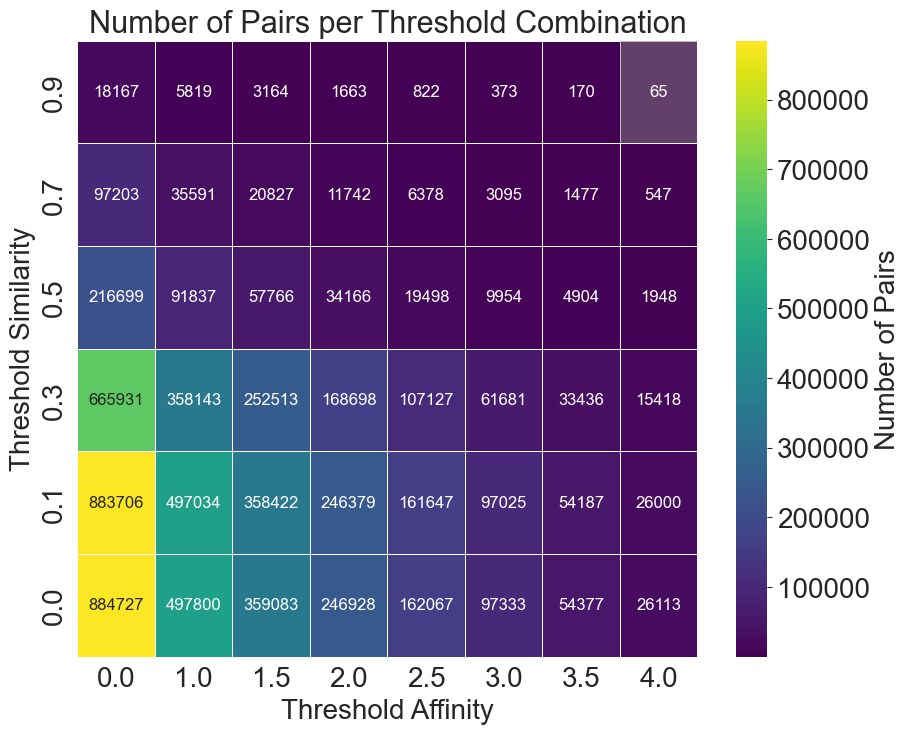

In [5]:
get_pairs_heatmap(results_bdb_best_rs_bl_1, 'DTI_BDB_rs', save_fig=True)

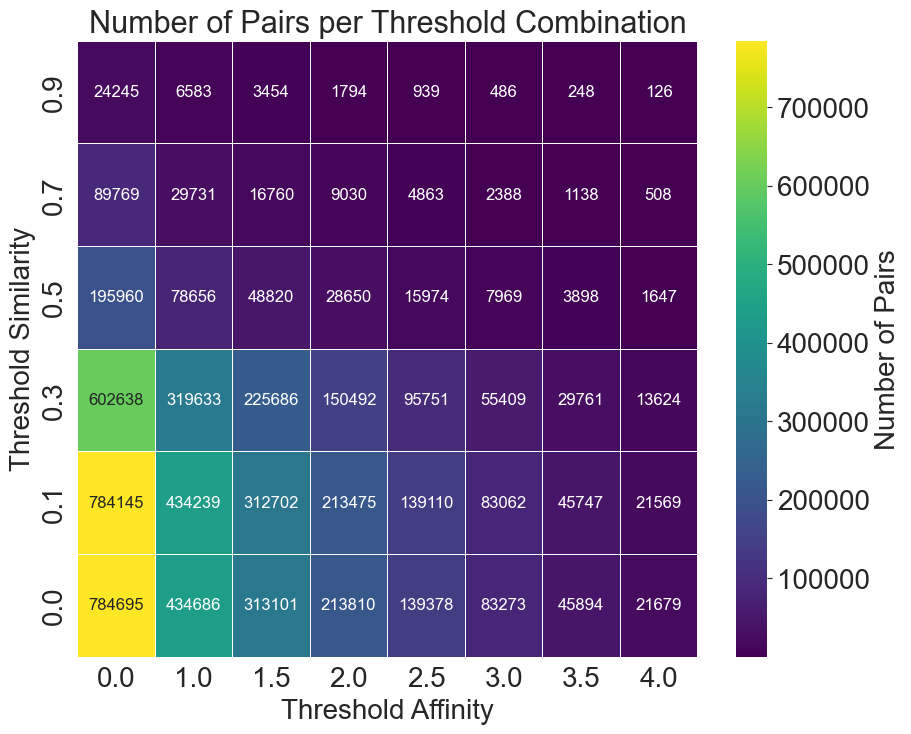

In [6]:
get_pairs_heatmap(results_bdb_best_cb_bl_1, 'DTI_BDB_cb', save_fig=True)

## Performance

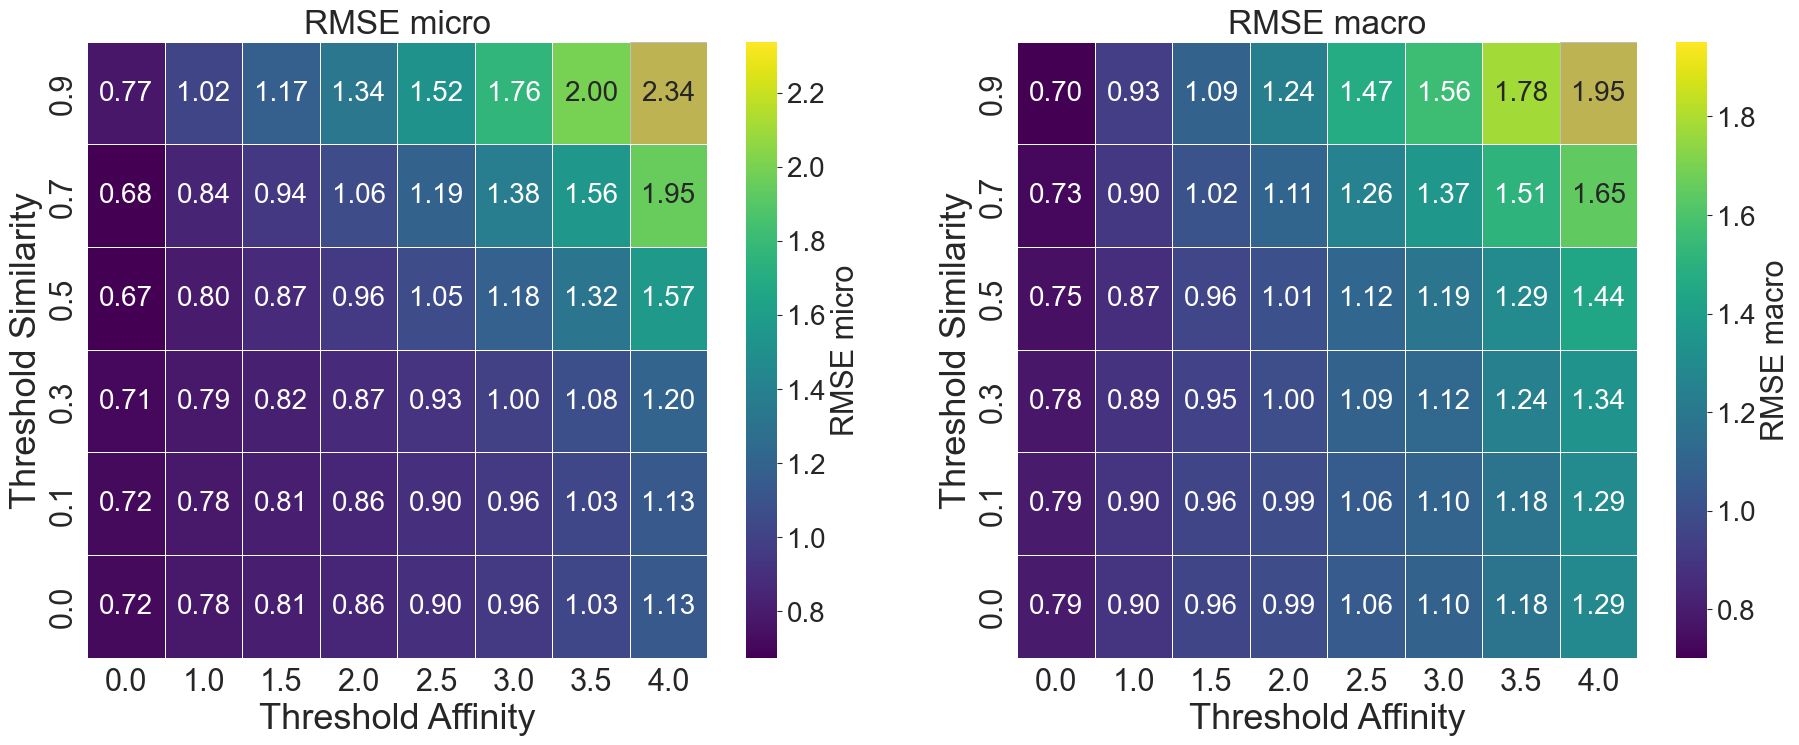

In [7]:
get_heatmap(results_bdb_best_rs_bl_1, 'both', model_name='DTI_BDB_best_rs_bl')

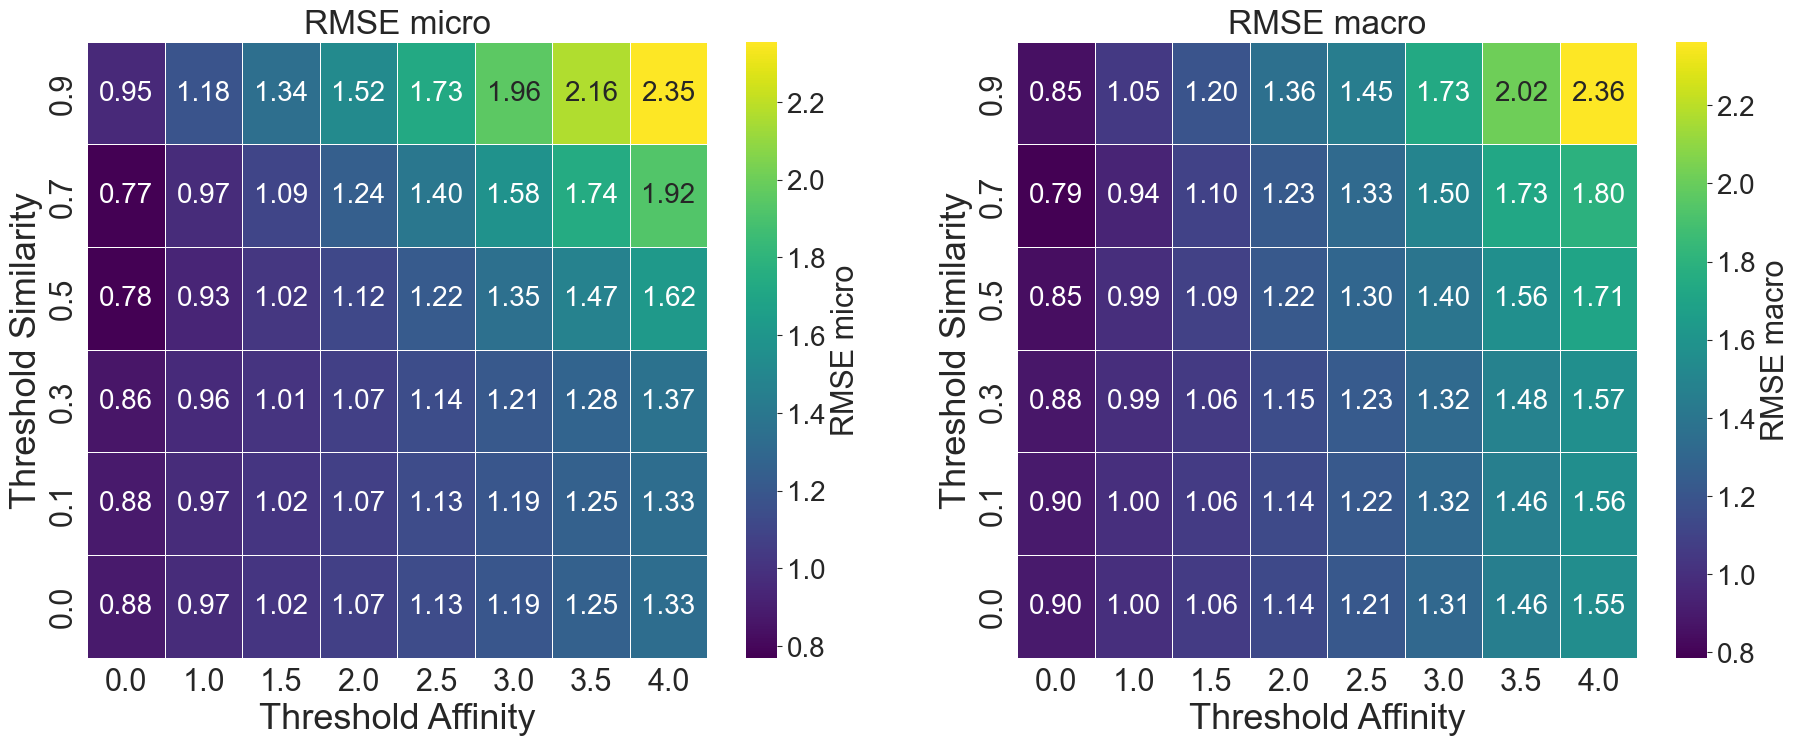

In [8]:
get_heatmap(results_bdb_best_cb_bl_1, 'both', model_name='DTI_BDB_best_cb_bl')

## Mean ± SD performance

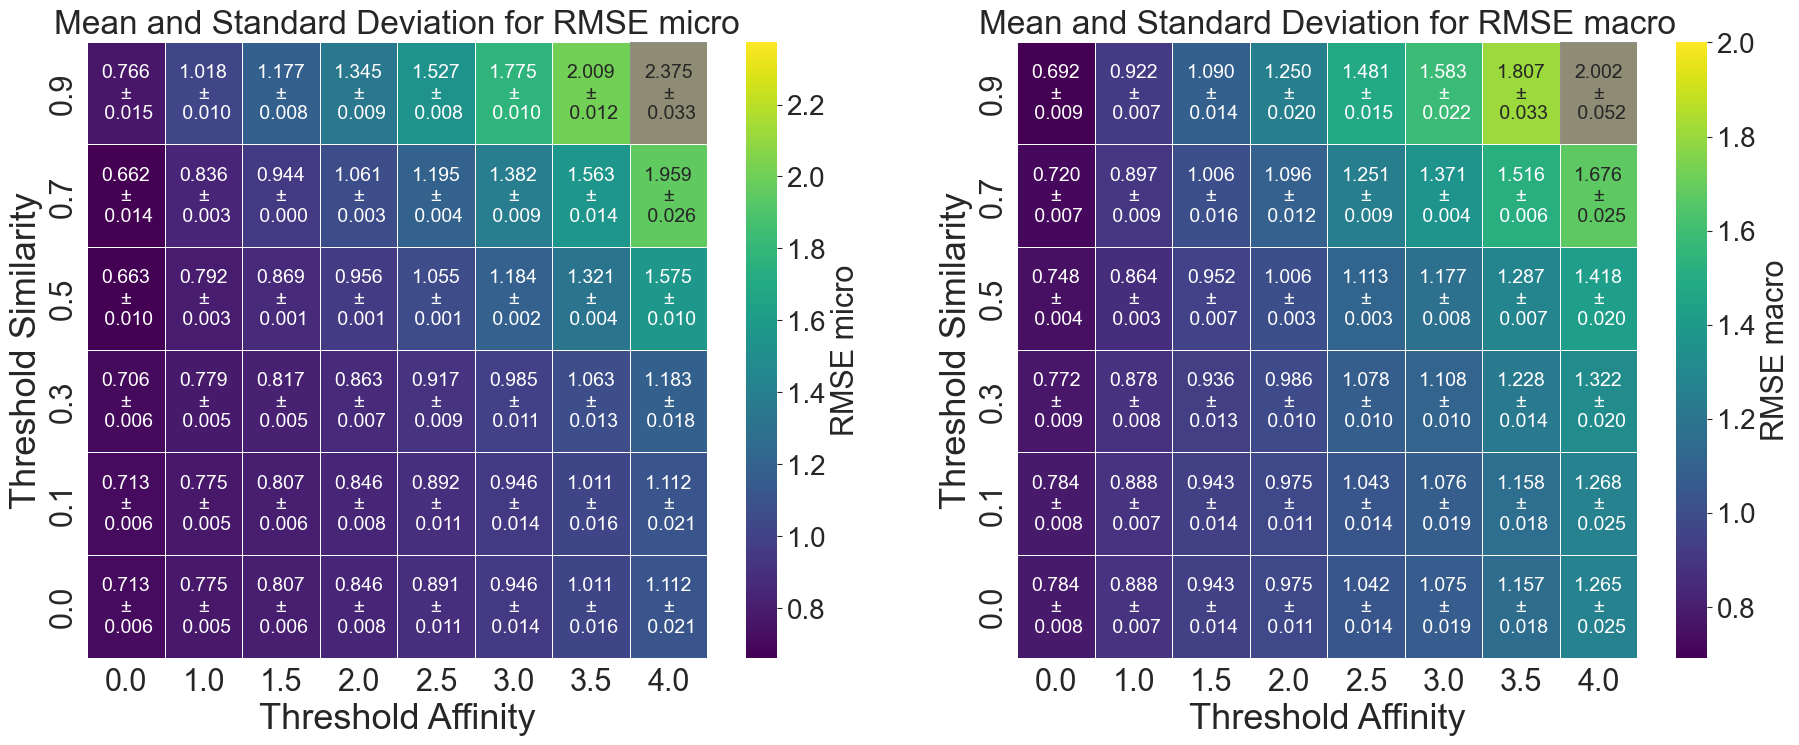

In [9]:
get_mean_sd_heatmap([results_bdb_best_rs_bl_1, results_bdb_best_rs_bl_2, results_bdb_best_rs_bl_3], 'both', 'DTI_BDB_best_rs_bl', save_fig=True)

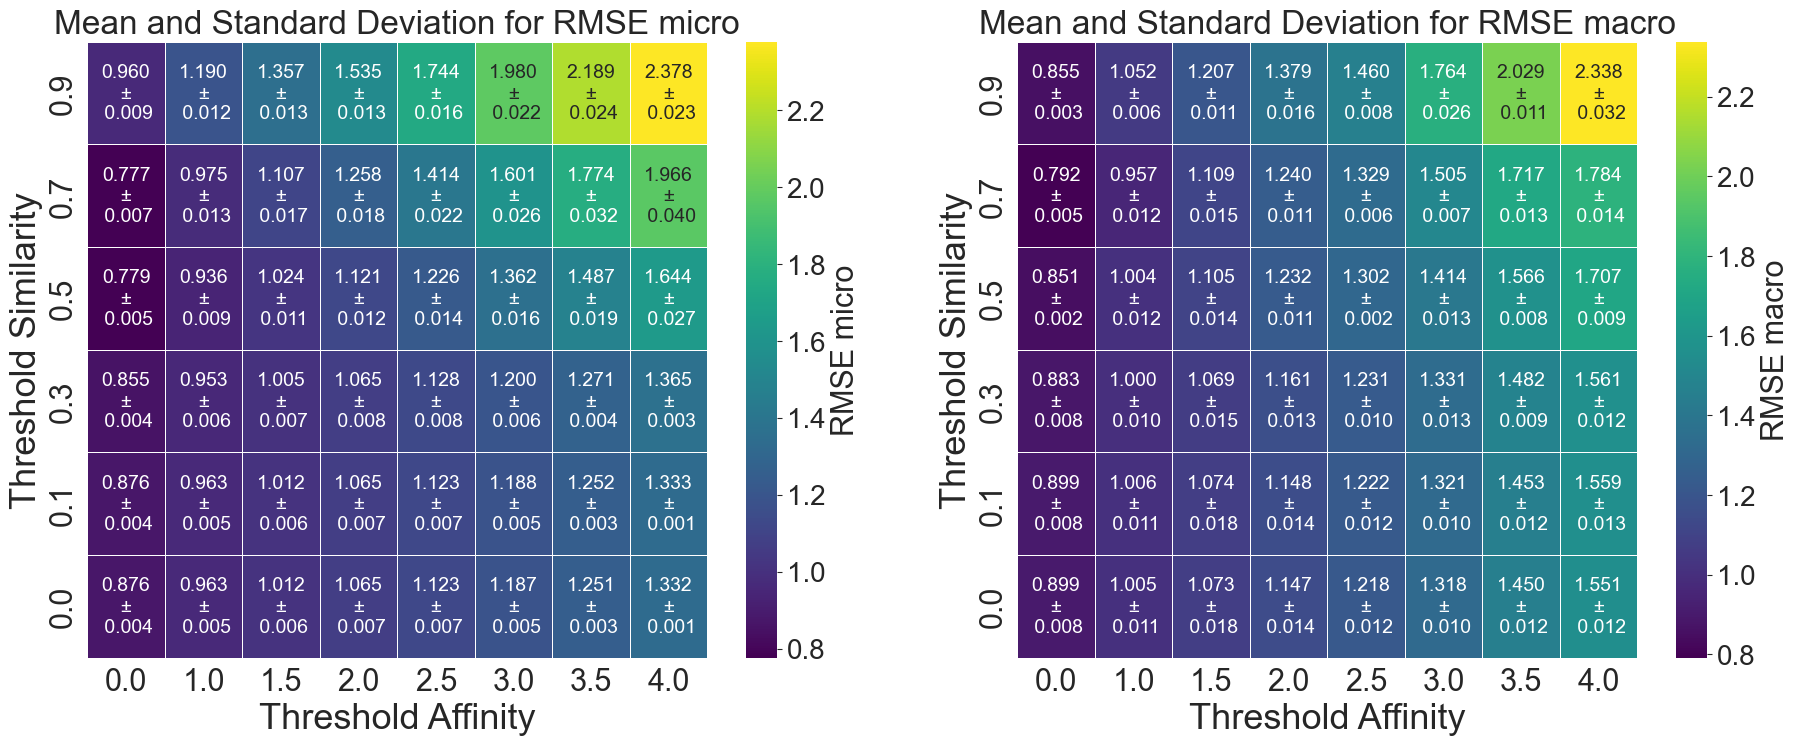

In [10]:
get_mean_sd_heatmap([results_bdb_best_cb_bl_1, results_bdb_best_cb_bl_2, results_bdb_best_cb_bl_3], 'both', 'DTI_BDB_best_cb_bl', save_fig=True)

# Transfer learning


## Random split
### Transferring only drug encoder


In [54]:
drug_target_data_rs = '../analysis/bdb_dti_r_split.csv'

In [55]:
preds_rs_tl_ws_1 = '../analysis/preds/DTI_BDB_rs_tl_ws_preds_1'
preds_rs_tl_ws_2 = '../analysis/preds/DTI_BDB_rs_tl_ws_preds_2'
preds_rs_tl_ws_3 = '../analysis/preds/DTI_BDB_rs_tl_ws_preds_3'

In [58]:
# for each case, change preds and file name to get the results
results = get_results(drug_target_data = drug_target_data_rs, 
                      preds = preds_rs_tl_ws_3,
                      file_name = 'DTI_BDB_rs_tl_ws_preds_3')

Processing All Thresholds: 100%|██████████| 48/48 [02:03<00:00,  2.58s/it]


In [59]:
results_rs_tl_ws_1 = pd.read_csv('../analysis/preds/DTI_BDB_rs_tl_ws_preds_1_metrics.csv')
results_rs_tl_ws_2 = pd.read_csv('../analysis/preds/DTI_BDB_rs_tl_ws_preds_2_metrics.csv')
results_rs_tl_ws_3 = pd.read_csv('../analysis/preds/DTI_BDB_rs_tl_ws_preds_3_metrics.csv')

#### Heatmaps performance

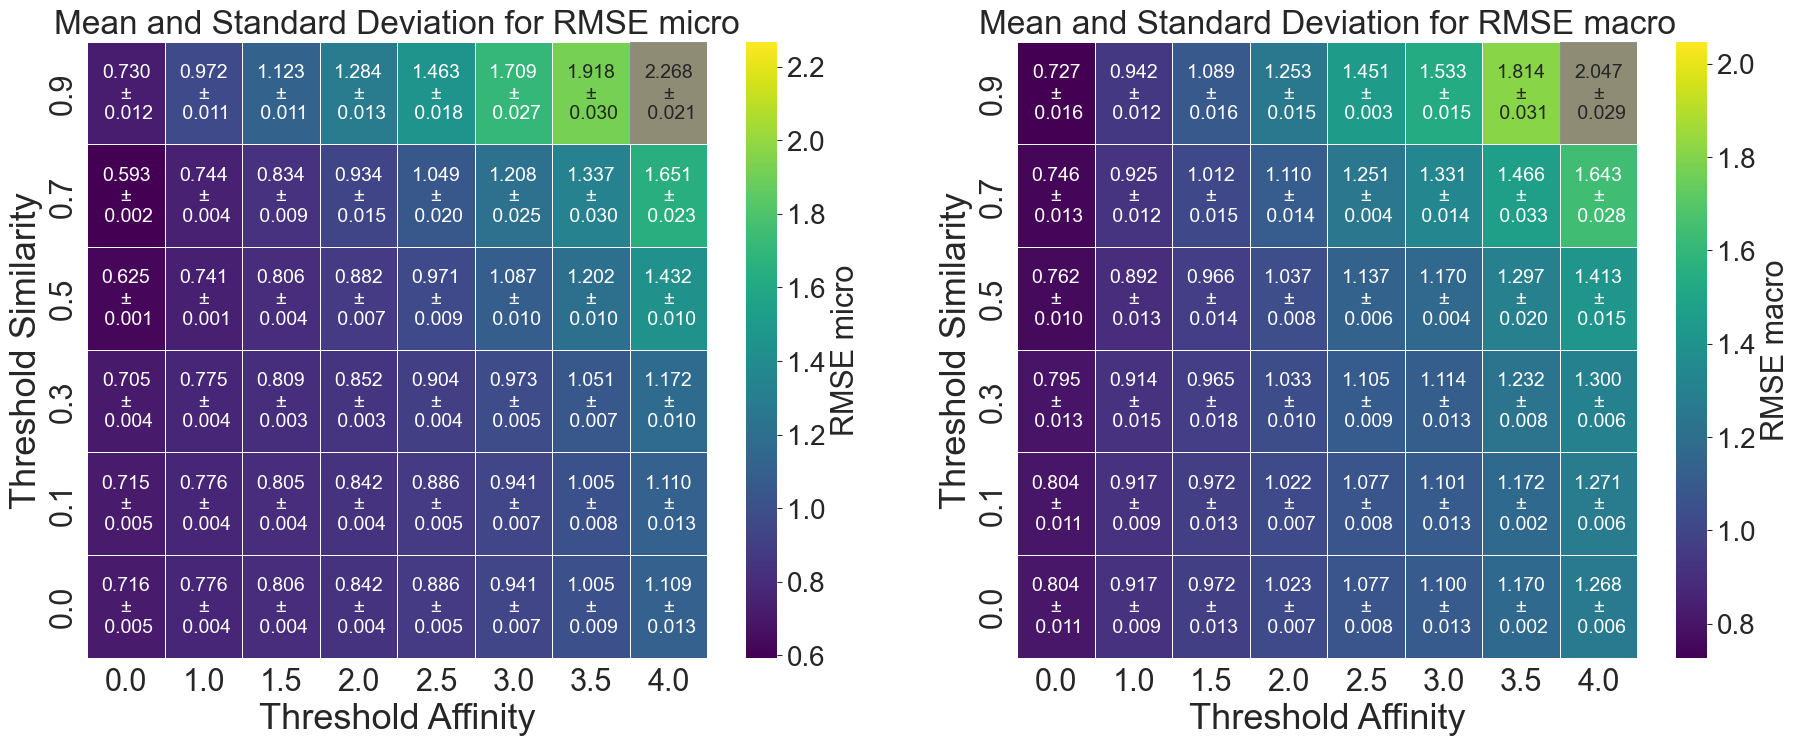

In [60]:
get_mean_sd_heatmap([results_rs_tl_ws_1, results_rs_tl_ws_2, results_rs_tl_ws_3], 'both', 'DTI_BDB_rs_tl_ws', save_fig=True)

#### Heatmaps differential performance

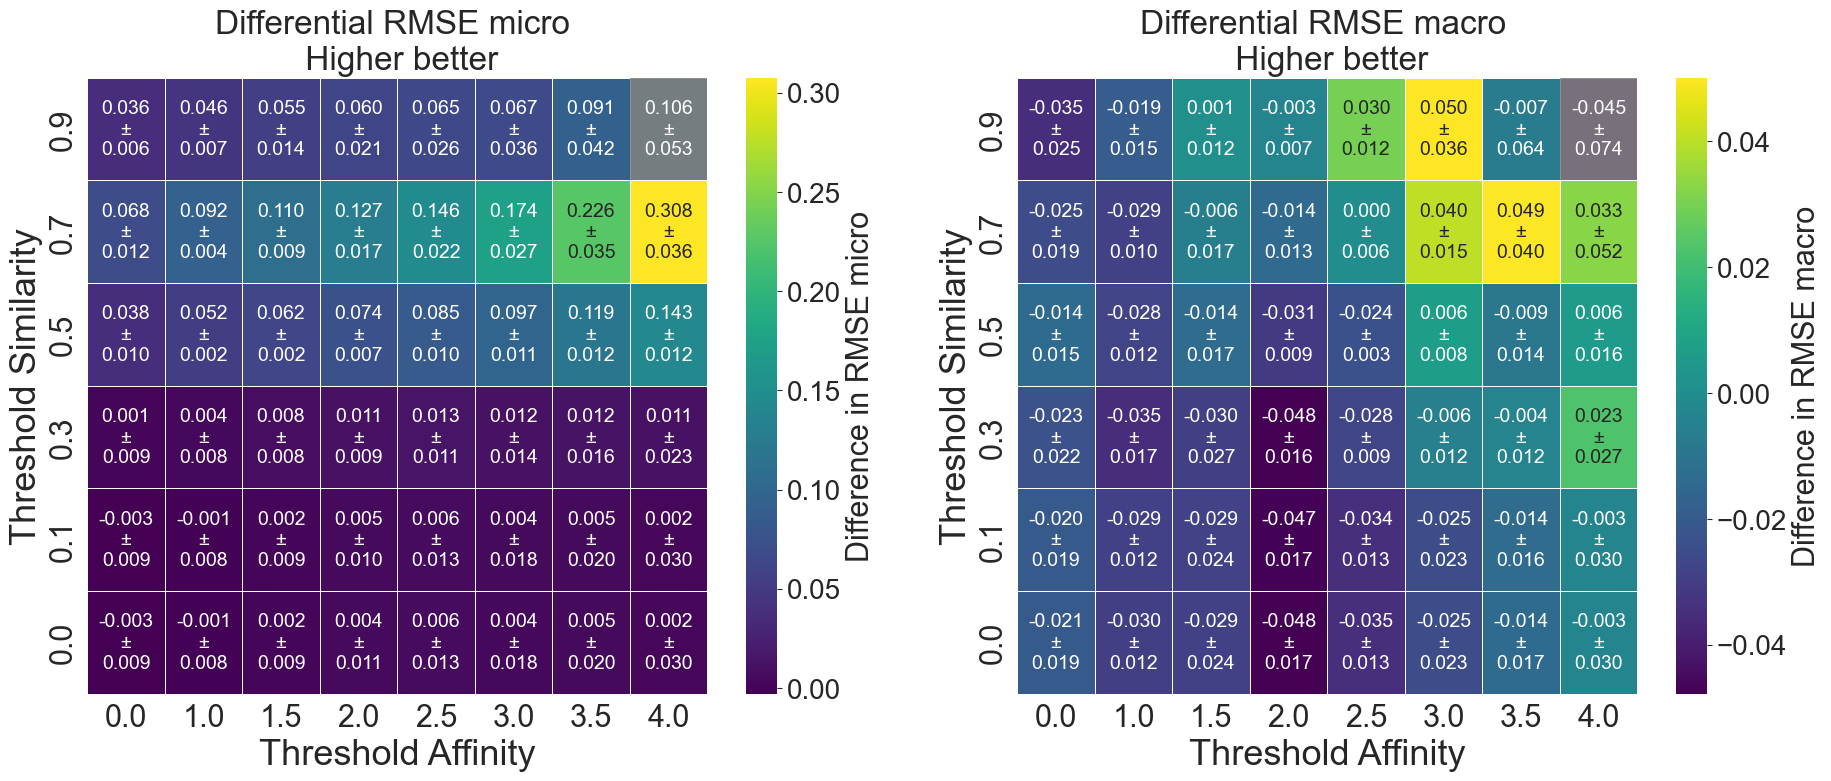

In [61]:
# 'both' means both rmse_micro and rmse_macro will be calculated
get_mean_sd_diff_heatmap([results_bdb_best_rs_bl_1, results_bdb_best_rs_bl_2, results_bdb_best_rs_bl_3], 
                         [results_rs_tl_ws_1, results_rs_tl_ws_2, results_rs_tl_ws_3], 
                         'both', 'DTI_BDB_rs_tl_ws', save_fig=True)

### Transferring both drug and target encoders

In [3]:
drug_target_data_rs = '../analysis/bdb_dti_r_split.csv'

In [4]:
preds_rs_tl_t_enc_ws_1 = '../analysis/preds/DTI_BDB_rs_tl_t_enc_ws_preds_1'
preds_rs_tl_t_enc_ws_2 = '../analysis/preds/DTI_BDB_rs_tl_t_enc_ws_preds_2'
preds_rs_tl_t_enc_ws_3 = '../analysis/preds/DTI_BDB_rs_tl_t_enc_ws_preds_3'

In [7]:
# for each case, change preds and file name to get the results
results = get_results(drug_target_data = drug_target_data_rs, 
                      preds = preds_rs_tl_t_enc_ws_3,
                      file_name = 'DTI_BDB_rs_tl_t_enc_ws_preds_3')

Processing All Thresholds: 100%|██████████| 48/48 [02:15<00:00,  2.82s/it]


In [8]:
# results obtained by the code above 
results_rs_tl_t_enc_ws_1 = pd.read_csv('../analysis/preds/DTI_BDB_rs_tl_t_enc_ws_preds_1_metrics.csv')
results_rs_tl_t_enc_ws_2 = pd.read_csv('../analysis/preds/DTI_BDB_rs_tl_t_enc_ws_preds_2_metrics.csv')
results_rs_tl_t_enc_ws_3 = pd.read_csv('../analysis/preds/DTI_BDB_rs_tl_t_enc_ws_preds_3_metrics.csv')

#### Heatmaps performance

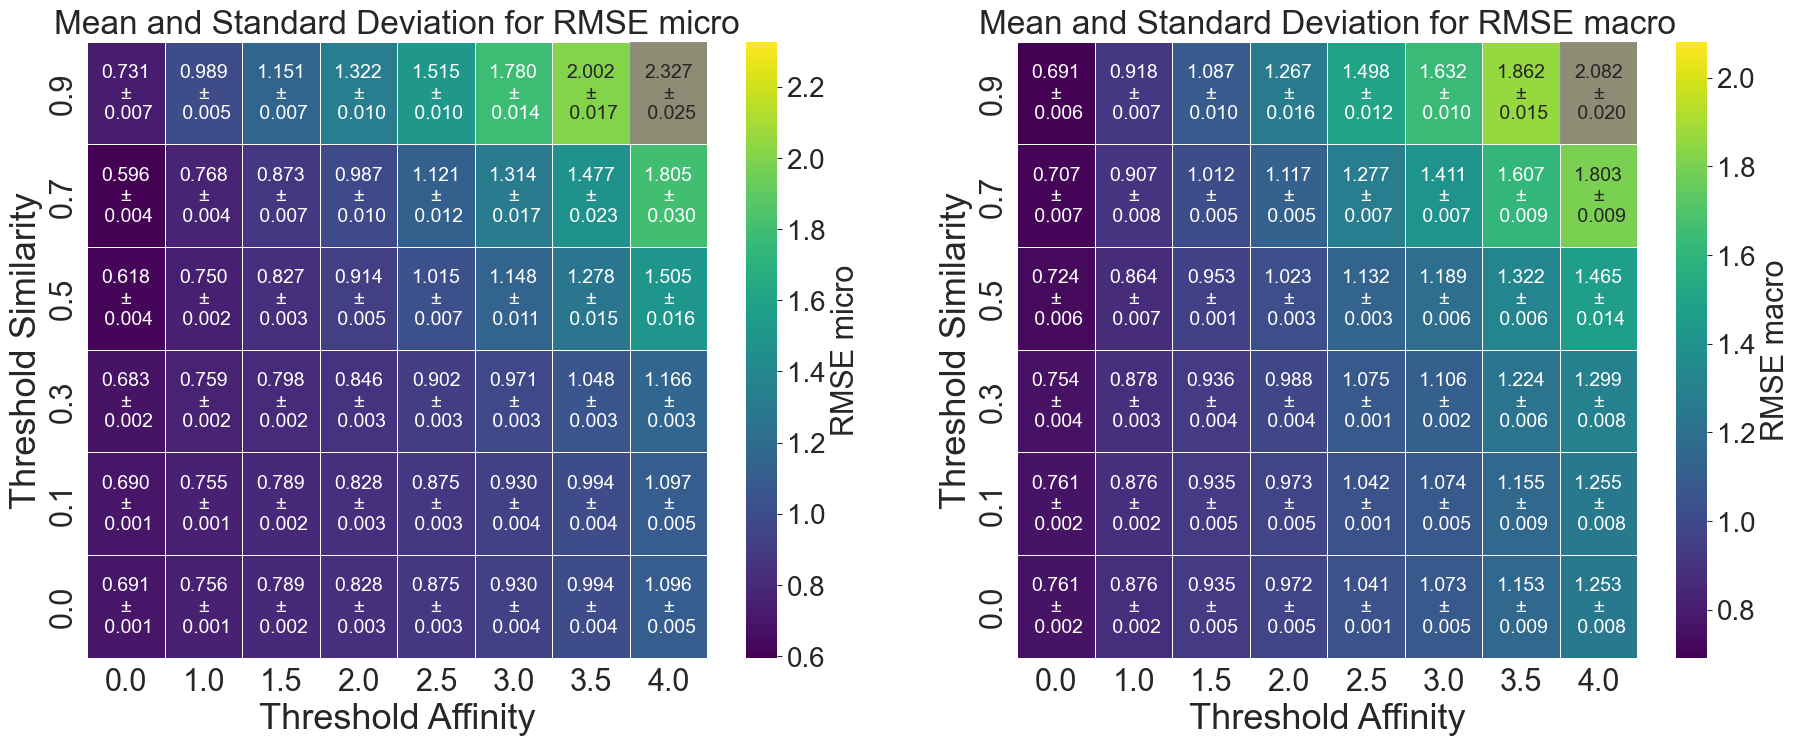

In [9]:
get_mean_sd_heatmap([results_rs_tl_t_enc_ws_1, results_rs_tl_t_enc_ws_2, results_rs_tl_t_enc_ws_3], 'both', 'DTI_BDB_rs_tl_t_enc_ws', save_fig=True)

#### Heatmaps differential performance

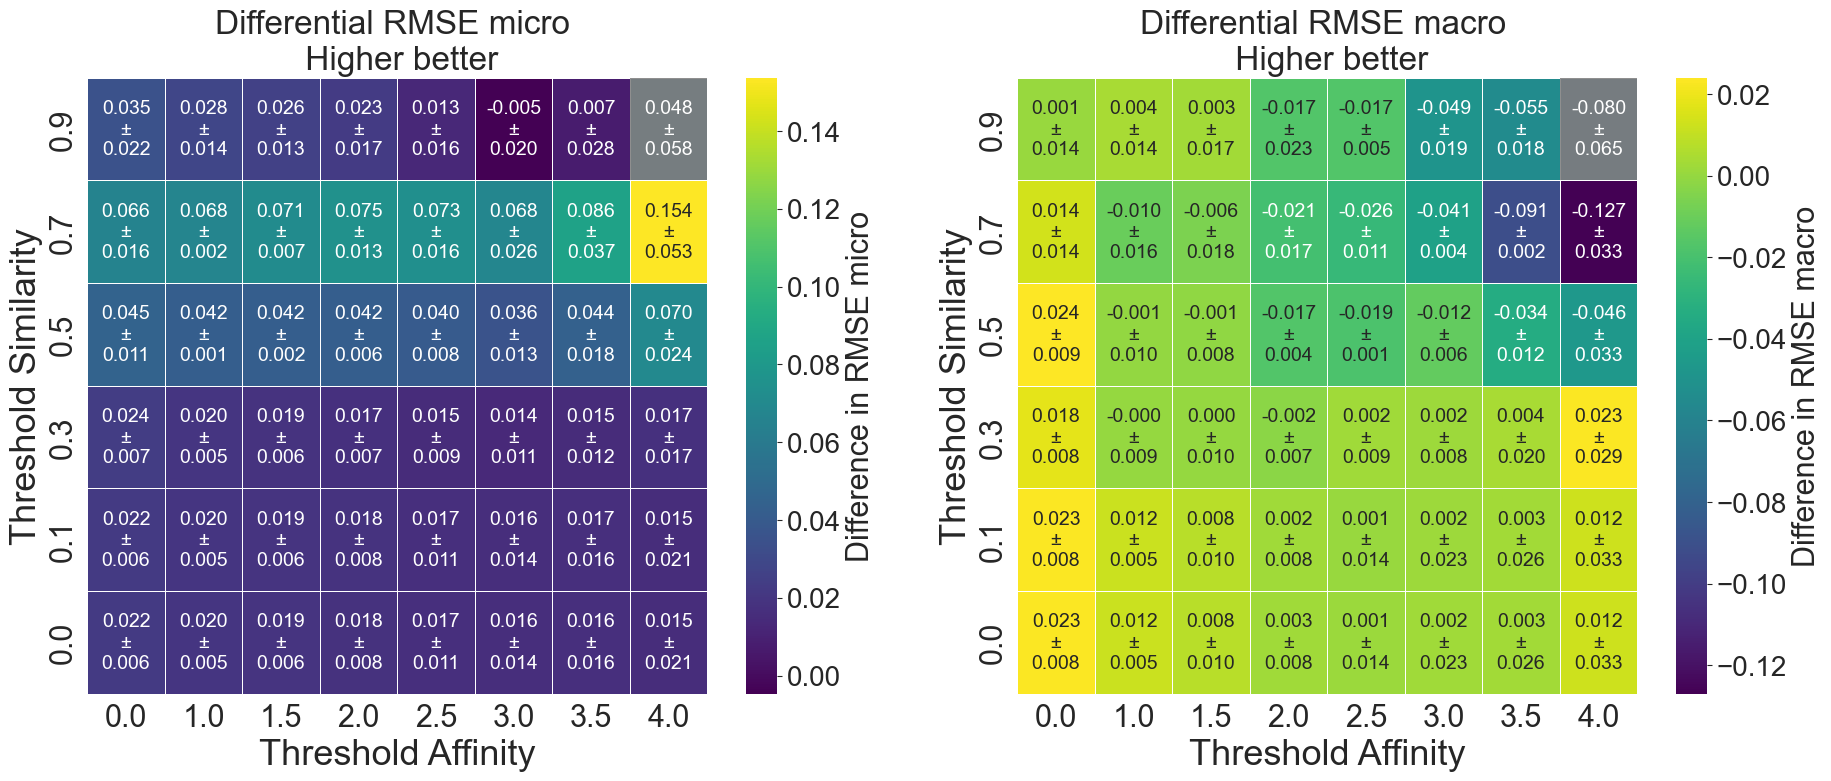

In [15]:
get_mean_sd_diff_heatmap([results_bdb_best_rs_bl_1, results_bdb_best_rs_bl_2, results_bdb_best_rs_bl_3], 
                         [results_rs_tl_t_enc_ws_1, results_rs_tl_t_enc_ws_2, results_rs_tl_t_enc_ws_3], 
                         'both', 'DTI_BDB_rs_tl_t_enc_ws', save_fig=True)

## Compound-based split


### Transferring only drug encoder


In [62]:
drug_target_data_cb = '../analysis/bdb_dti_cb_split.csv'

In [63]:
preds_cb_tl_ws_1 = '../analysis/preds/DTI_BDB_cb_tl_ws_preds_1'
preds_cb_tl_ws_2 = '../analysis/preds/DTI_BDB_cb_tl_ws_preds_1'
preds_cb_tl_ws_3 = '../analysis/preds/DTI_BDB_cb_tl_ws_preds_1'

In [30]:
# for each case, change preds and file name to get the results
results = get_results(drug_target_data = drug_target_data_cb, 
                      preds = preds_cb_tl_ws_2,
                      file_name = 'DTI_BDB_cb_tl_ws_preds_2')

Processing All Thresholds: 100%|██████████| 48/48 [01:57<00:00,  2.44s/it]


In [64]:
results_cb_tl_ws_1 = pd.read_csv('../analysis/preds/DTI_BDB_cb_tl_ws_preds_1_metrics.csv')
results_cb_tl_ws_2 = pd.read_csv('../analysis/preds/DTI_BDB_cb_tl_ws_preds_2_metrics.csv')
results_cb_tl_ws_3 = pd.read_csv('../analysis/preds/DTI_BDB_cb_tl_ws_preds_3_metrics.csv')

#### Heatmaps performance

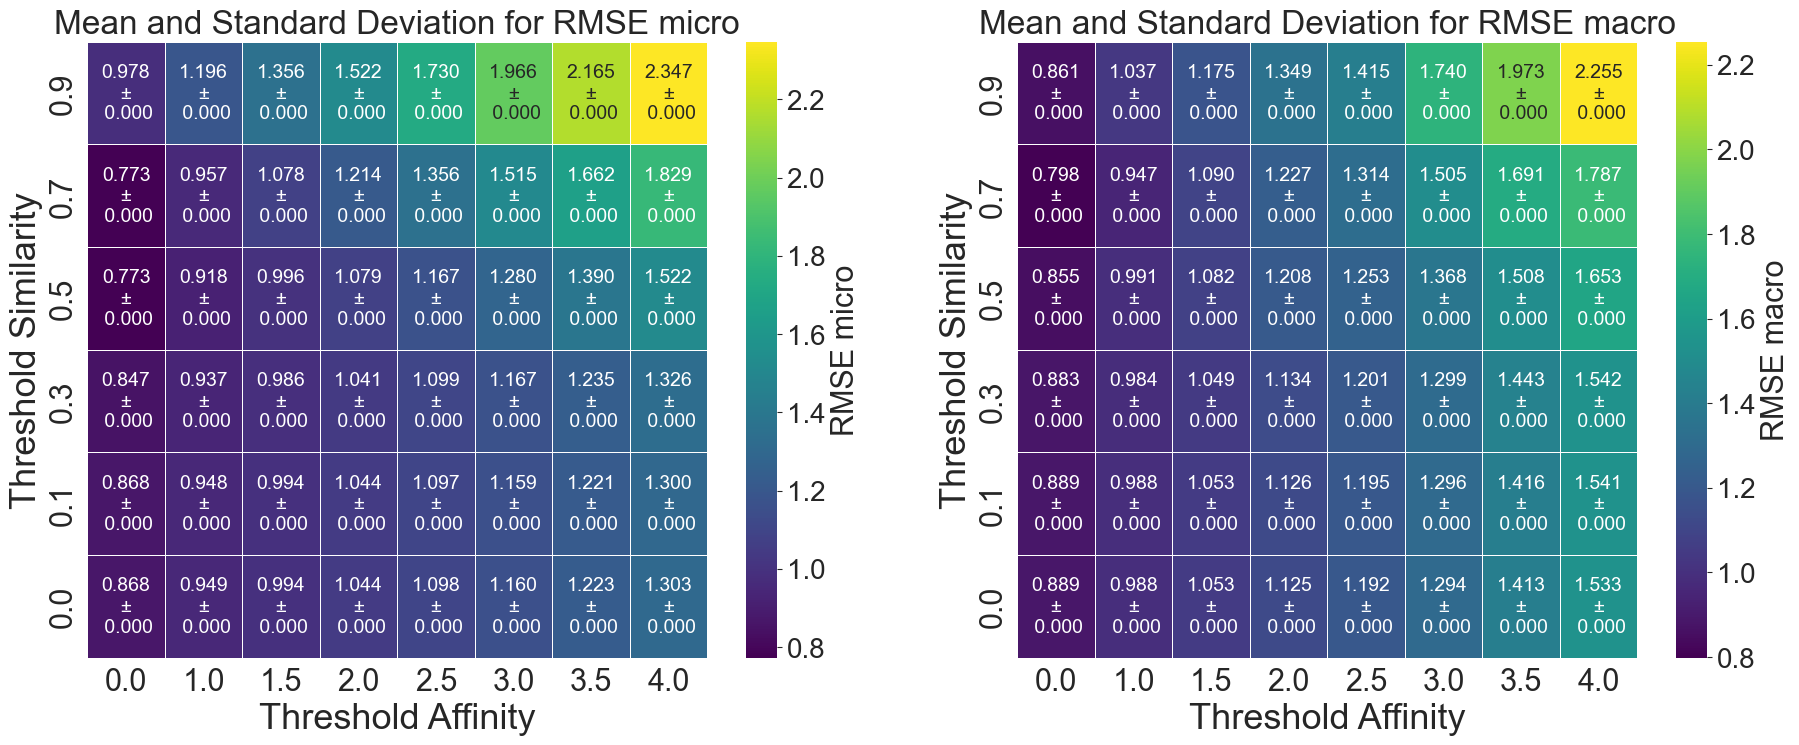

In [65]:
get_mean_sd_heatmap([results_cb_tl_ws_1, results_cb_tl_ws_2, results_cb_tl_ws_3], 'both', 'DTI_BDB_cb_tl_ws', save_fig=True)

#### Heatmaps differential performance

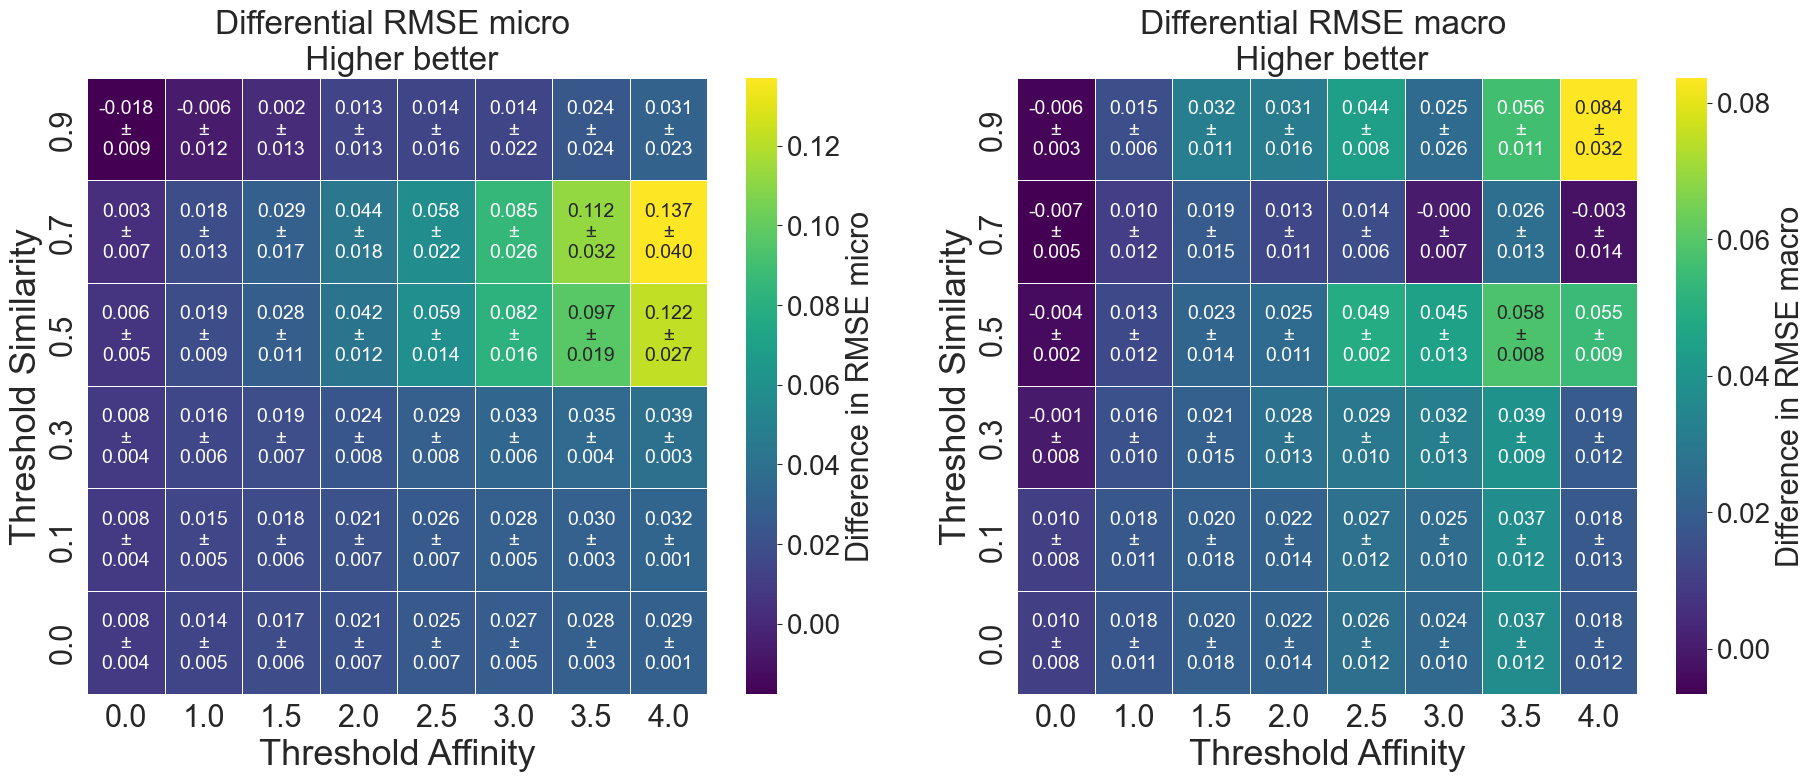

In [72]:
get_mean_sd_diff_heatmap([results_bdb_best_cb_bl_1, results_bdb_best_cb_bl_2, results_bdb_best_cb_bl_3], 
                         [results_cb_tl_ws_1, results_cb_tl_ws_2, results_cb_tl_ws_3], 
                         'both', 'DTI_BDB_cb_tl_ws', save_fig=True)

### Transferring both drug and target encoders

In [68]:
drug_target_data_cb = '../analysis/bdb_dti_cb_split.csv'

In [43]:
preds_cb_tl_t_enc_ws_1 = '../analysis/preds/DTI_BDB_cb_tl_t_enc_ws_preds_1'
preds_cb_tl_t_enc_ws_2 = '../analysis/preds/DTI_BDB_cb_tl_t_enc_ws_preds_2'
preds_cb_tl_t_enc_ws_3 = '../analysis/preds/DTI_BDB_cb_tl_t_enc_ws_preds_3'

In [46]:
# for each case, change preds and file name to get the results
results = get_results(drug_target_data = drug_target_data_cb, 
                      preds = preds_cb_tl_t_enc_ws_3,
                      file_name = 'DTI_BDB_cb_tl_t_enc_ws_preds_3')

Processing All Thresholds: 100%|██████████| 48/48 [04:08<00:00,  5.18s/it]


In [69]:
results_cb_tl_t_enc_ws_1 = pd.read_csv('../analysis/preds/DTI_BDB_cb_tl_t_enc_ws_preds_1_metrics.csv')
results_cb_tl_t_enc_ws_2 = pd.read_csv('../analysis/preds/DTI_BDB_cb_tl_t_enc_ws_preds_2_metrics.csv')
results_cb_tl_t_enc_ws_3 = pd.read_csv('../analysis/preds/DTI_BDB_cb_tl_t_enc_ws_preds_3_metrics.csv')

#### Heatmaps performance

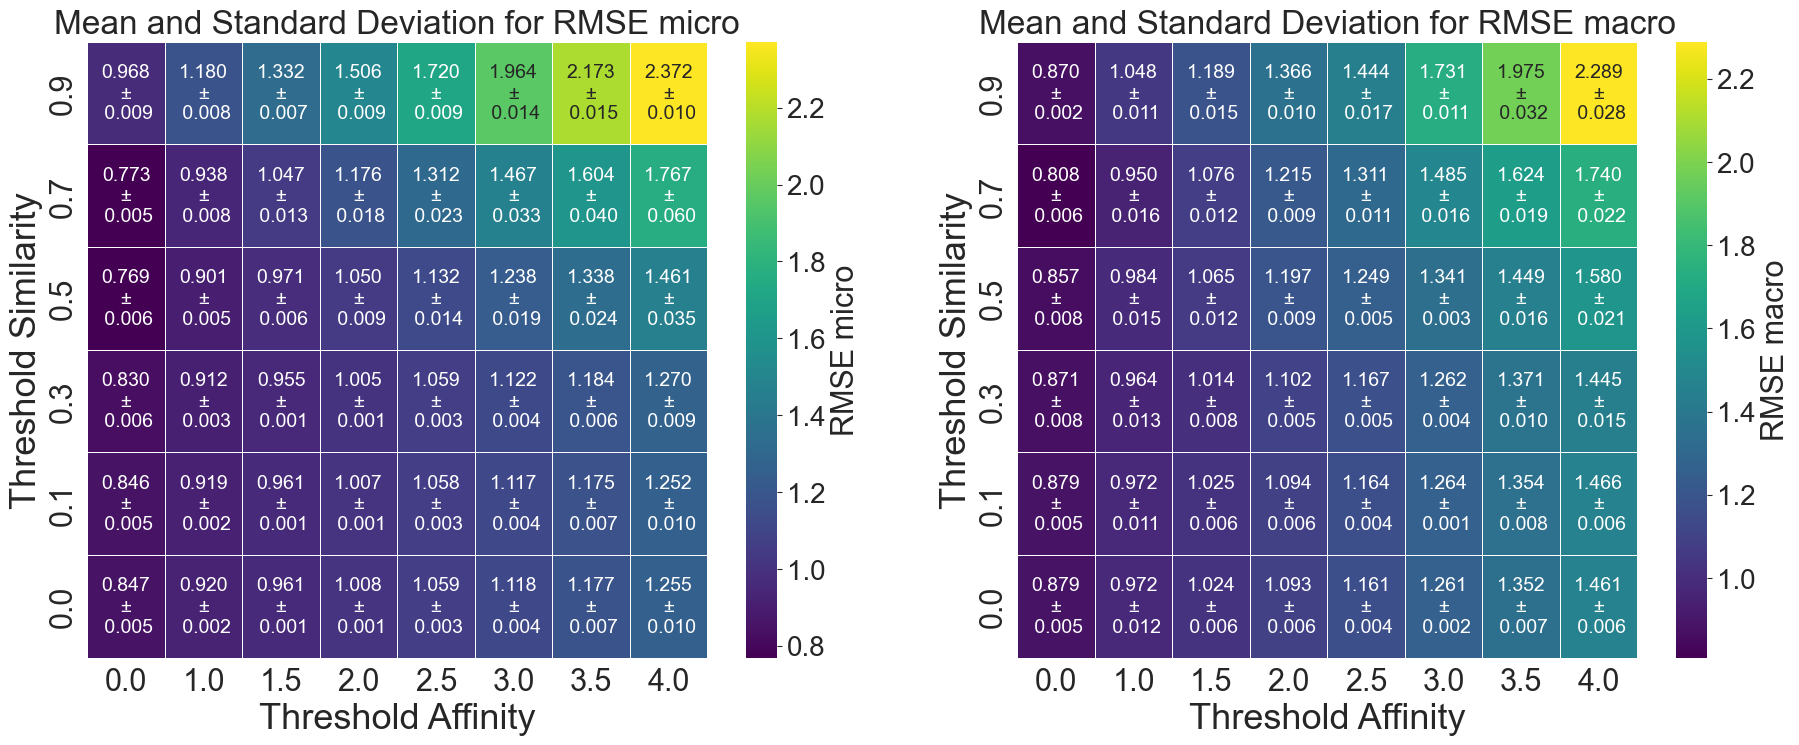

In [70]:
get_mean_sd_heatmap([results_cb_tl_t_enc_ws_1, results_cb_tl_t_enc_ws_2, results_cb_tl_t_enc_ws_3], 'both', 'DTI_BDB_cb_tl_t_enc_ws', save_fig=True)

#### Heatmaps differential performance

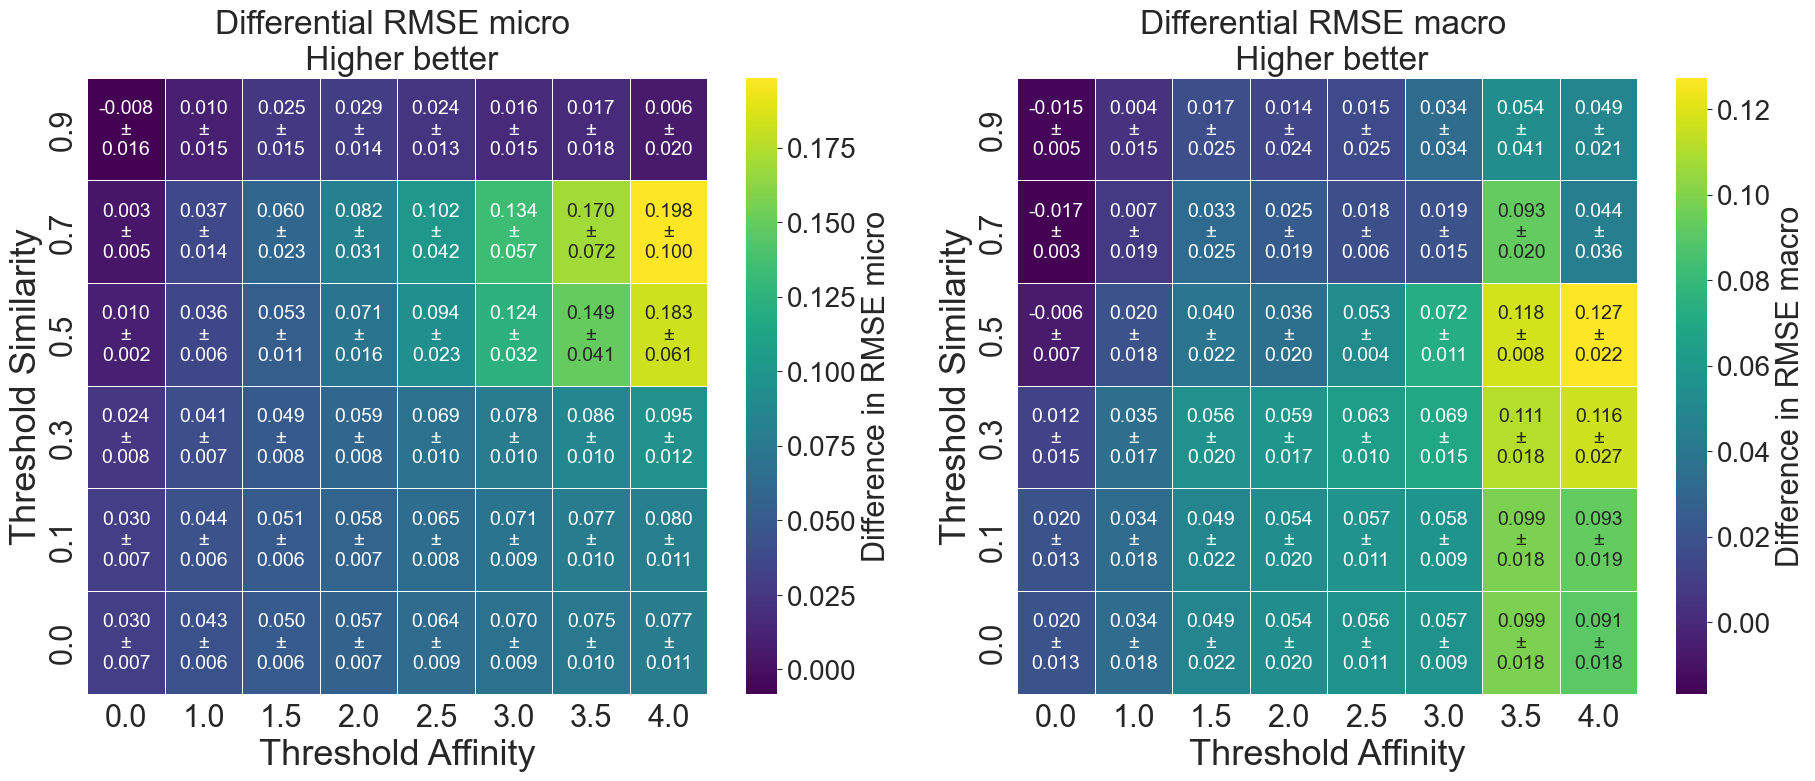

In [73]:
get_mean_sd_diff_heatmap([results_bdb_best_cb_bl_1, results_bdb_best_cb_bl_2, results_bdb_best_cb_bl_3], 
                         [results_cb_tl_t_enc_ws_1, results_cb_tl_t_enc_ws_2, results_cb_tl_t_enc_ws_3], 
                         'both', 'DTI_BDB_cb_tl_t_enc_ws', save_fig=True)